In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [21]:
df=pd.read_csv("supermarket.csv")

In [22]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [14]:
df.groupby("City").get_group("Yangon")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [26]:
df['date'] = pd.to_datetime(df['Date'])

In [41]:
type(df['date'])
df['date'] = pd.to_datetime(df['date'])
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour    #type(df['Time'])


In [39]:
df["Time"].nunique()

506

In [47]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

Text(0.5, 1.0, 'Ratings by Branch')

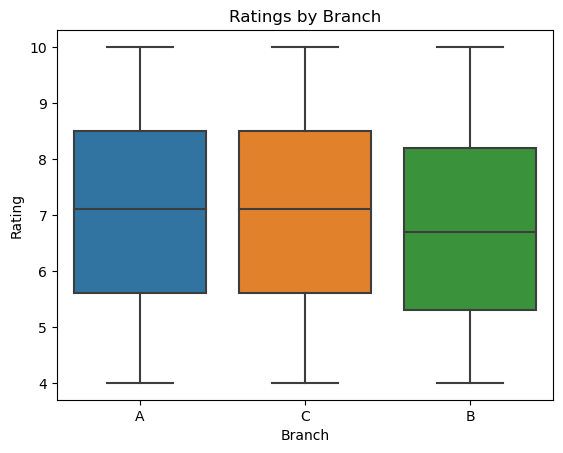

In [31]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch") 


Text(0.5, 1.0, 'Product Sales per Hour')

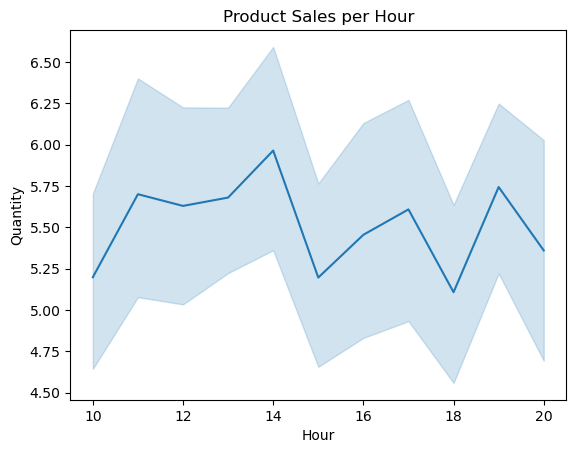

In [48]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")


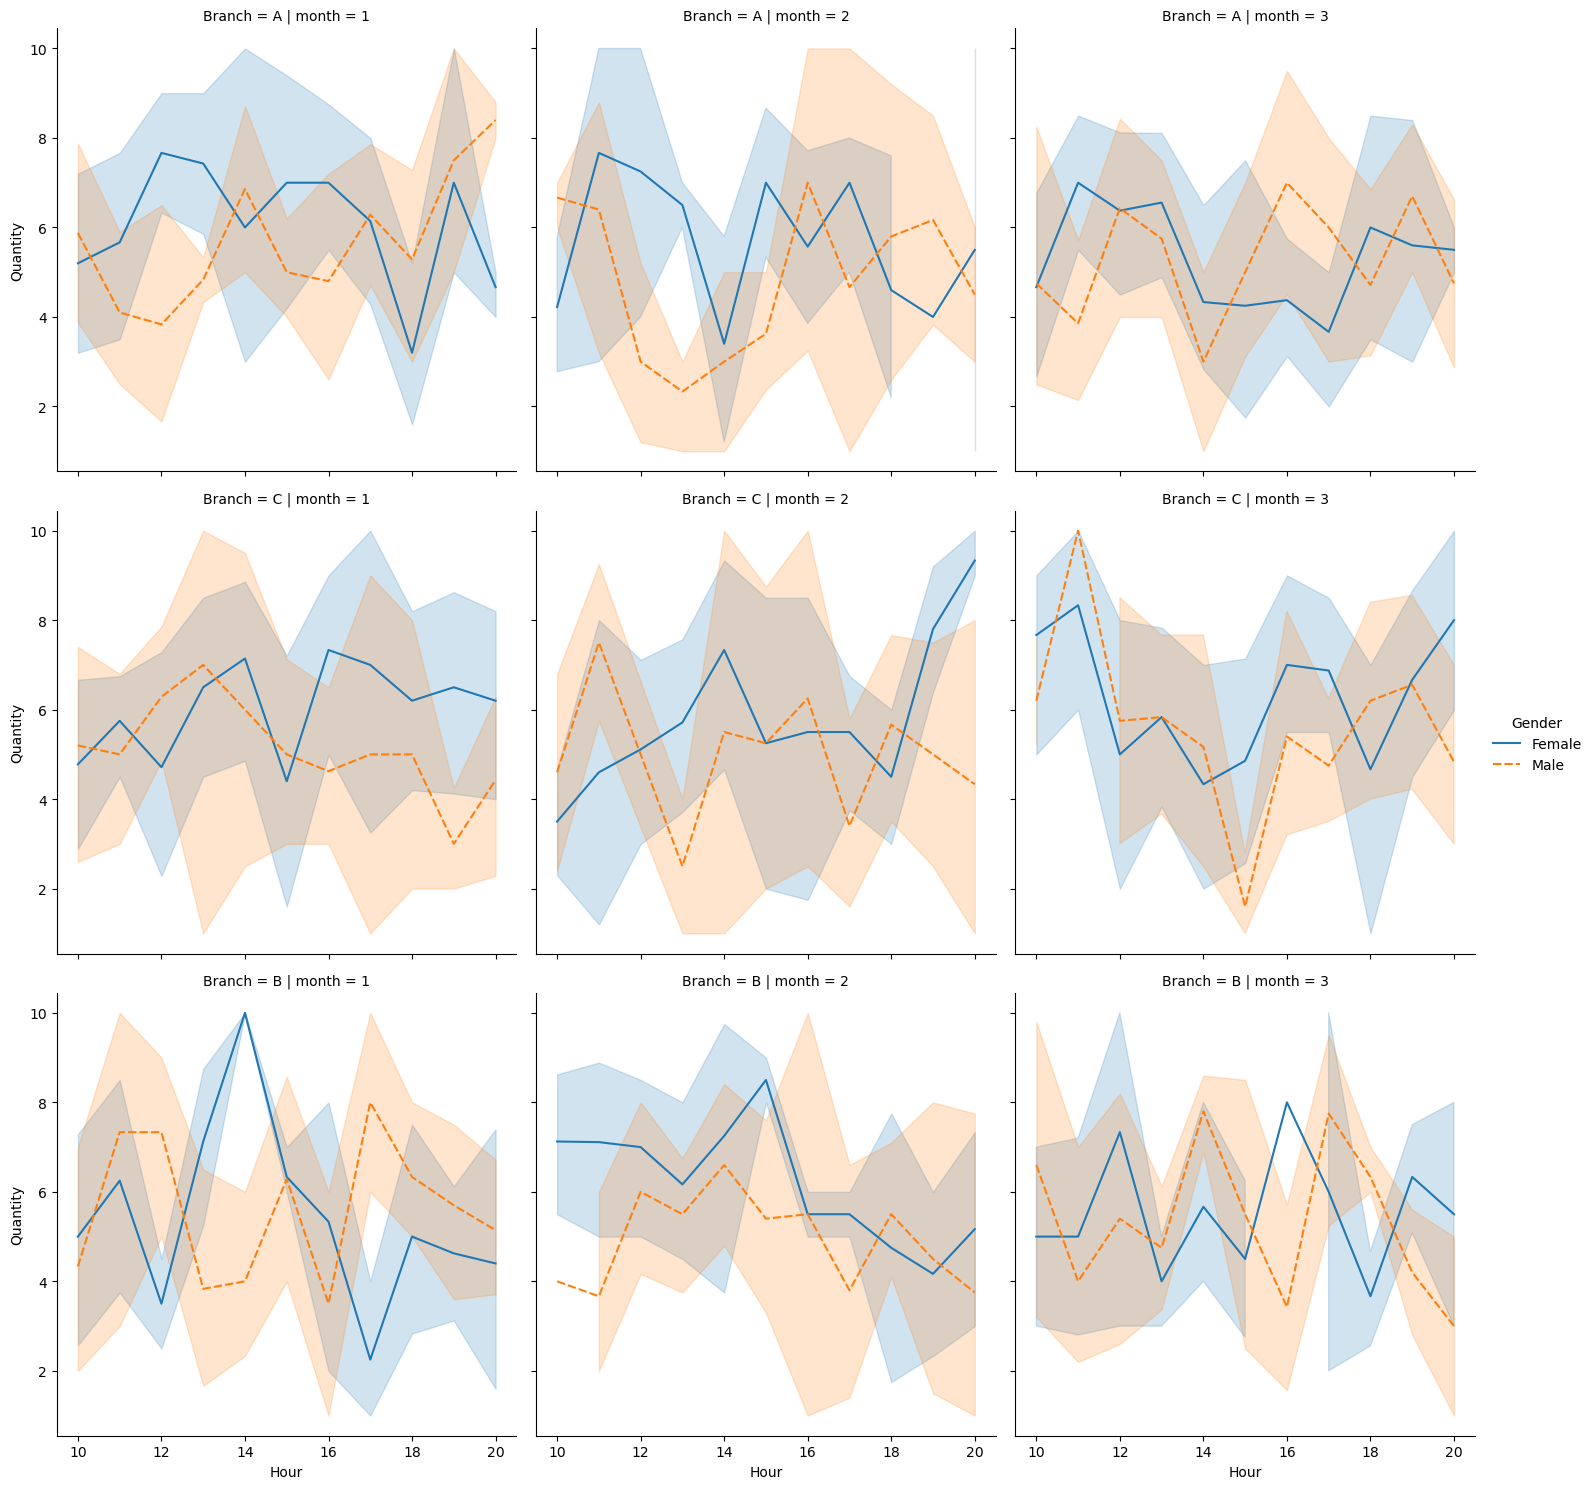

In [50]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data=df)

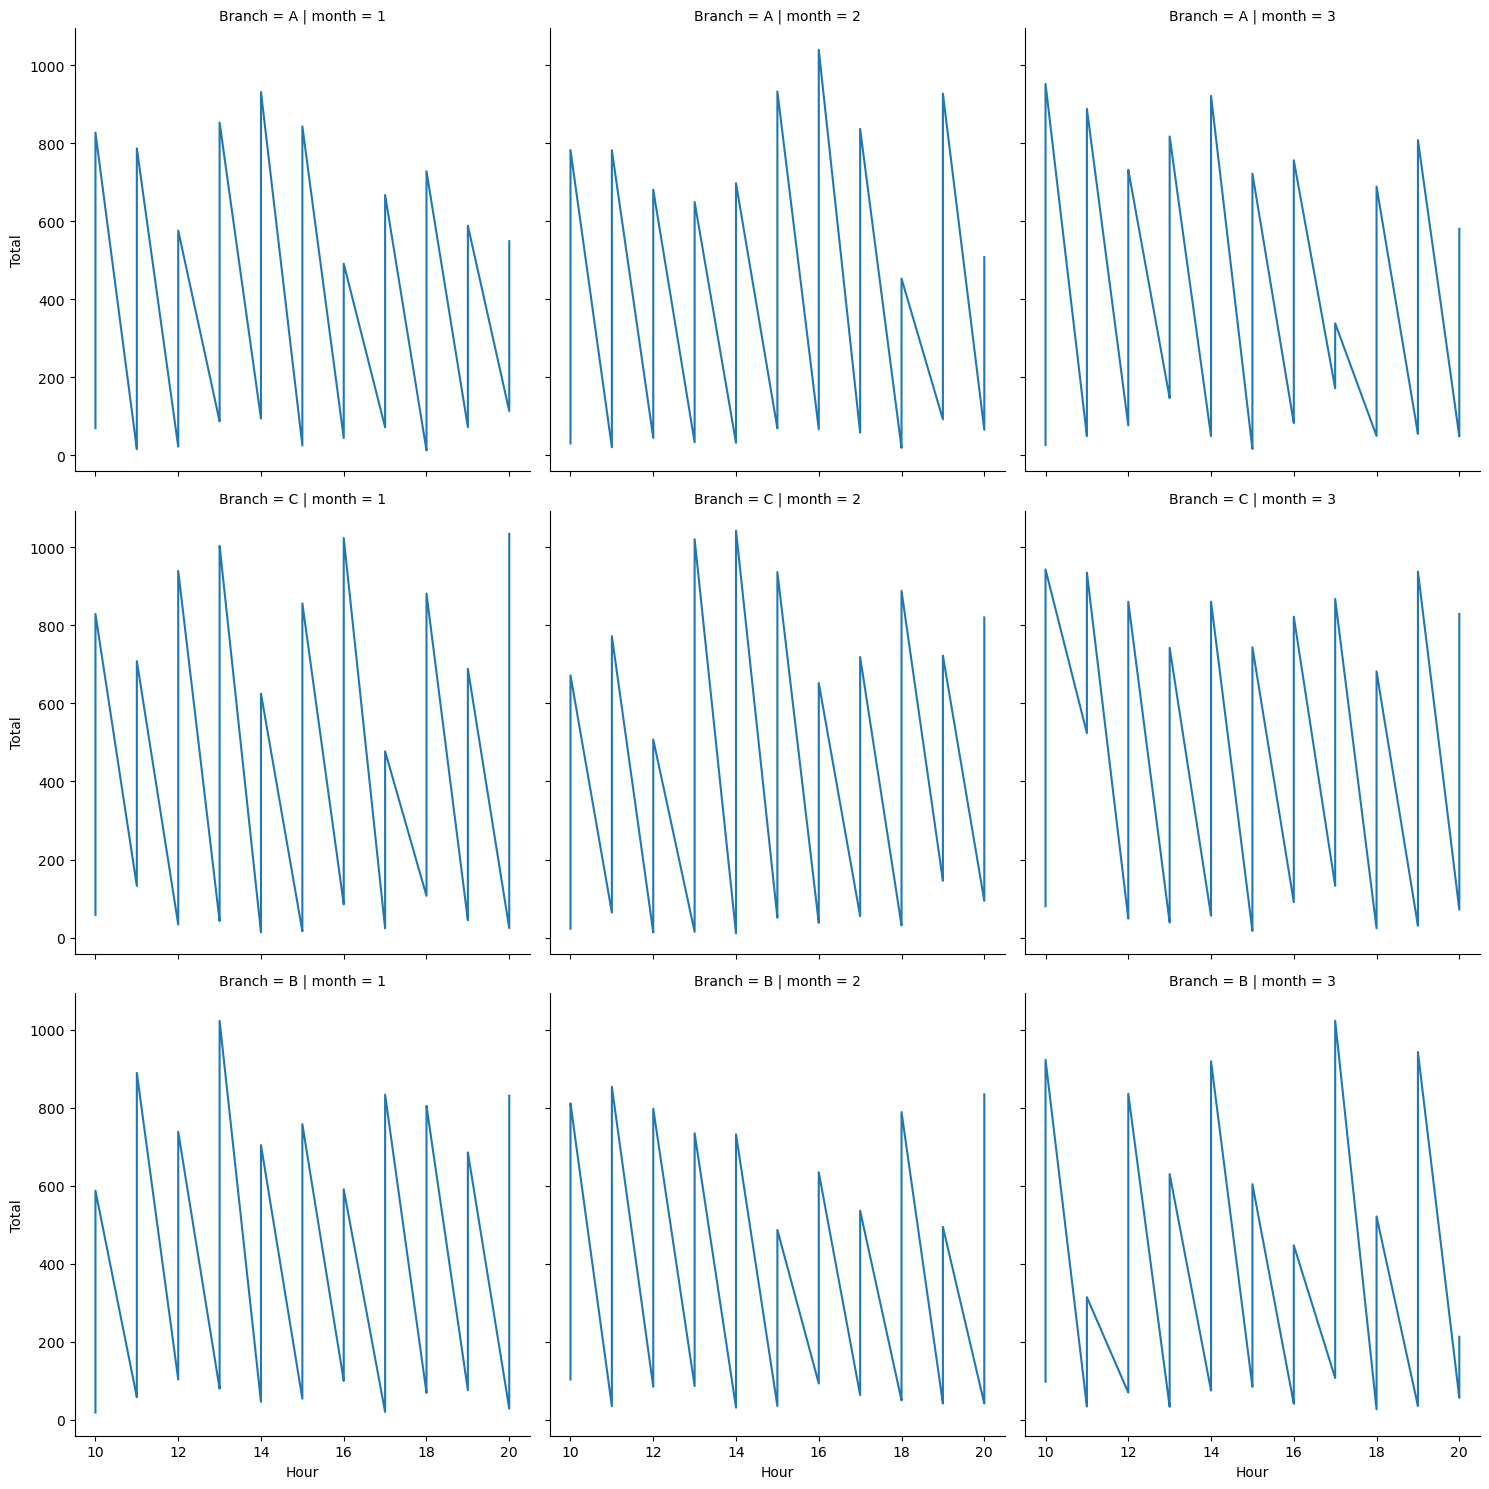

In [51]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)


In [55]:
df['Rating'].nunique()


61

<AxesSubplot:xlabel='Total', ylabel='Rating'>

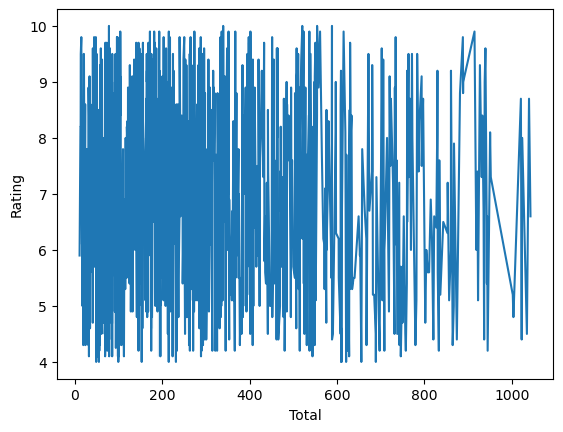

In [56]:
sns.lineplot(x="Total", y = "Rating", data =df)

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

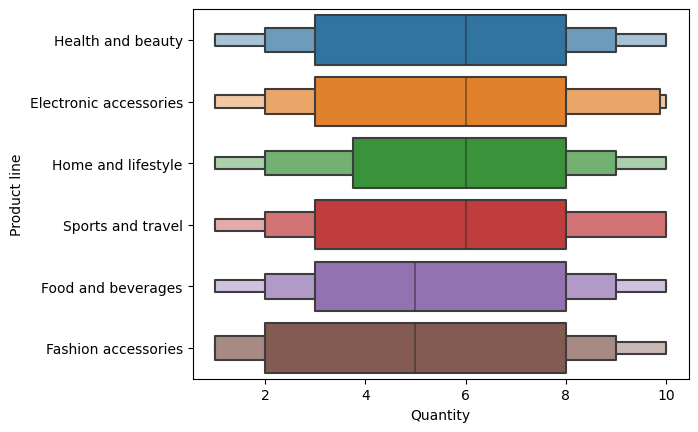

In [57]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )


<AxesSubplot:xlabel='count', ylabel='Product line'>

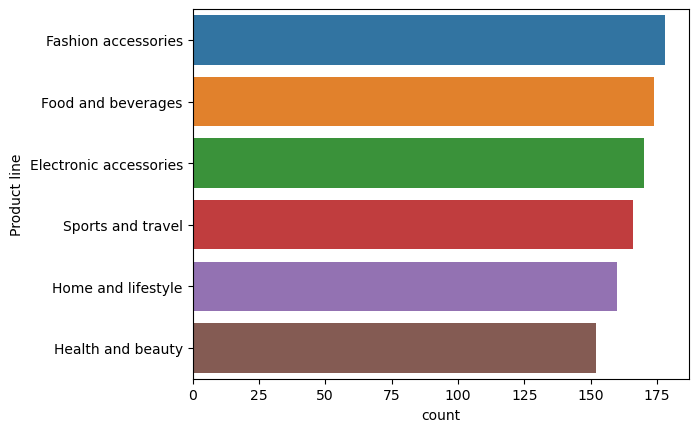

In [58]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )


<AxesSubplot:xlabel='Total', ylabel='Product line'>

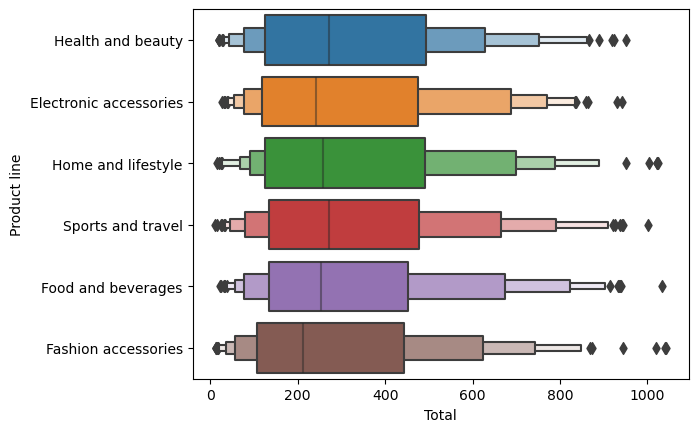

In [59]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df )


<AxesSubplot:xlabel='Total', ylabel='Product line'>

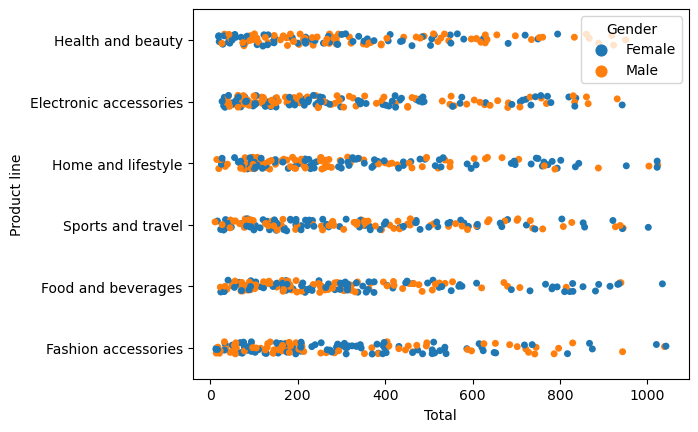

In [60]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )


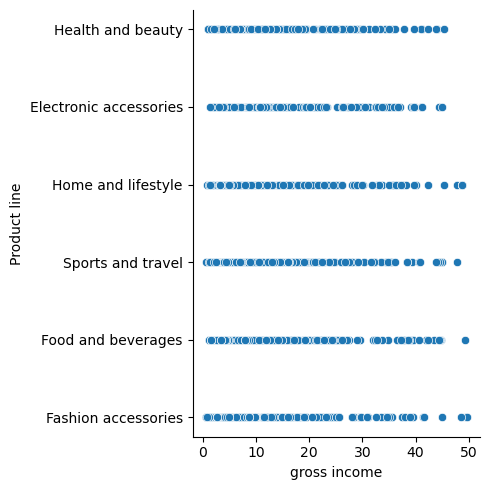

In [61]:
sns.relplot(y = 'Product line', x = 'gross income', data=df )


<AxesSubplot:xlabel='Rating', ylabel='Product line'>

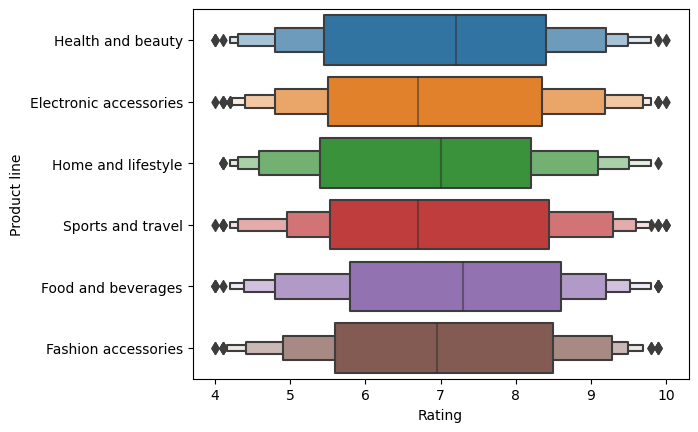

In [62]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )


Text(0.5, 1.0, 'Payment Channel')

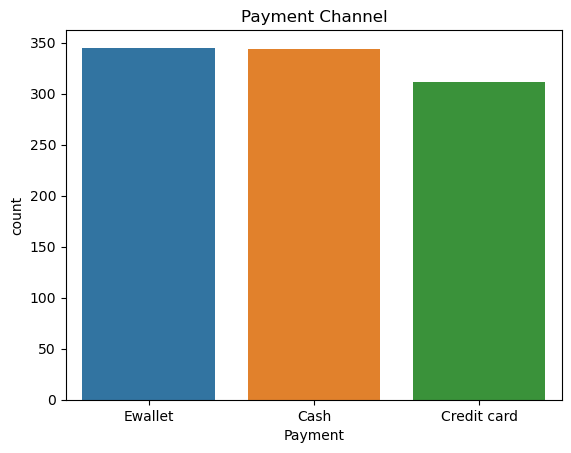

In [63]:
 sns.countplot(x="Payment", data = df).set_title("Payment Channel") 


Text(0.5, 1.0, 'Payment Channel by Branch')

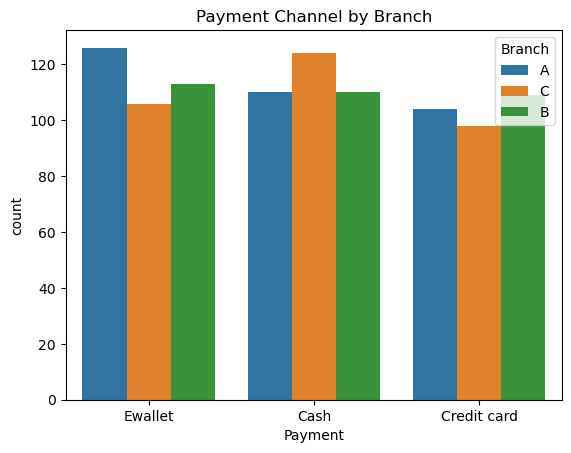

In [64]:
 sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 


Text(0.5, 1.0, 'Customer Type')

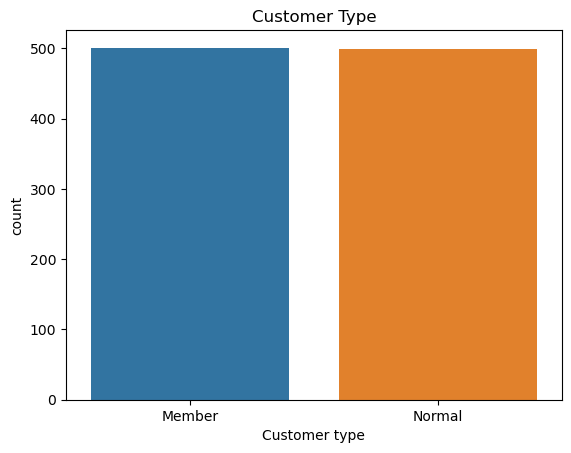

In [66]:
 sns.countplot(x="Customer type", data =df).set_title("Customer Type") 


Text(0.5, 1.0, 'Customer Type by Branch')

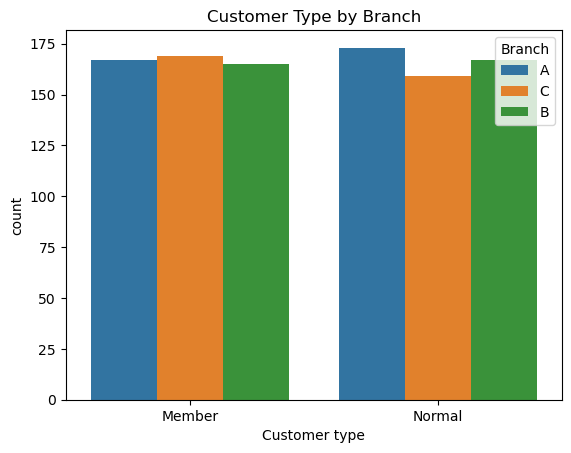

In [67]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch") 
